In [16]:
import os 
import pandas as pd 
from pandas.plotting import autocorrelation_plot
from pandas import to_datetime
import pylab

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import math 

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt


import pmdarima as pm
from pmdarima.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

import scipy.stats as stats


In [18]:
#mental_health_2019 = pd.read_csv('C:/Users/justd/Desktop/IPI - PRSA/Demographic_Mental_health/demo_2019.csv', header=1)

#mental_health_2018 = pd.read_csv('C:/Users/justd/Desktop/IPI - PRSA/Demographic_Mental_health/analytic_data2018.csv', header=1)
#mental_health_2018 = mental_health_2018.loc[:,mental_health_2019.columns]




#mental_health_2020 = pd.read_csv('C:/Users/justd/Desktop/IPI - PRSA/Demographic_Mental_health/analytic_data2020.csv', header=1)
#mental_health_2020 = mental_health_2020.loc[:,mental_health_2019.columns]

#mental_health_2021 = pd.read_csv('C:/Users/justd/Desktop/IPI - PRSA/Demographic_Mental_health/analytic_data2021.csv', header=1)
#mental_health_2021 = mental_health_2021.loc[:,mental_health_2019.columns]

#mental_health_2022 = pd.read_csv('C:/Users/justd/Desktop/IPI - PRSA/Demographic_Mental_health/analytic_data2022.csv', header=1)
#mental_health_2022 = mental_health_2022.loc[:,mental_health_2019.columns]



#checks for null values 
#mental_health_2018.isnull().sum()

#merge_data_1 = pd.merge(mental_health_2018, mental_health_2019, how='left')
#mental_health_2018.dropna(inplace=True)



,state,county,year,v049_rawvalue,v062_rawvalue,v062_other_data_1,v021_rawvalue,v023_rawvalue,v024_rawvalue,v044_rawvalue,...,v063_rawvalue,v015_rawvalue,v015_numerator,v015_denominator,v015_cilow,v015_cihigh,v148_rawvalue,v148_numerator,v051_rawvalue,v058_rawvalue
0,US,United States,2018,NaN,0.002142,466.751669,NaN,0.048690,0.195,4.960280,...,57617.0,5.265962,116577.0,2.213784e+09,5.2,5.3,11.026227,175697.0,323127513,NaN
1,AL,Alabama,2018,0.141781,0.000844,1184.725944,0.893225,0.059870,0.247,5.265774,...,46309.0,8.834696,2987.0,3.380988e+07,8.5,9.2,18.615286,4510.0,4863300,0.409632
2,AL,Autauga County,2018,0.168780,0.000126,7916.571429,0.900000,0.052712,0.193,4.388346,...,54487.0,3.619853,14.0,3.867560e+05,2.0,6.1,16.972533,47.0,55416,0.420022
3,AL,Baldwin County,2018,0.167150,0.000892,1121.306452,0.850000,0.054153,0.176,4.600735,...,56460.0,2.705282,37.0,1.367695e+06,1.9,3.7,14.718943,147.0,208563,0.422791
4,AL,Barbour County,2018,0.126987,0.000077,12982.500000,0.861735,0.086485,0.396,5.861660,...,32884.0,8.501865,16.0,1.881940e+05,4.9,13.8,14.219641,19.0,25965,0.677896


In [2]:
####################################
#Writing modified dataset to system#
####################################

#mental_health_2020.to_csv('C:/Users/justd/Desktop/IPI - PRSA/Demographic_Mental_health/demo_2020.csv', index=False)
#mental_health_2021.to_csv('C:/Users/justd/Desktop/IPI - PRSA/Demographic_Mental_health/demo_2021.csv', index=False)
#mental_health_2022.to_csv('C:/Users/justd/Desktop/IPI - PRSA/Demographic_Mental_health/demo_2022.csv', index=False)

#mental_health_2018.to_csv('C:/Users/justd/Desktop/IPI - PRSA/Demographic_Mental_health/demo_2018.csv', index=False)

#health_demo = pd.concat([mental_health_2018,mental_health_2019,mental_health_2020,mental_health_2021,mental_health_2022])

#health_demo.to_csv('C:/Users/justd/Desktop/IPI - PRSA/Demographic_Mental_health/health_demo_2018_2022.csv', index=False)

health_demo = pd.read_csv('C:/Users/justd/Desktop/IPI - PRSA/Demographic_Mental_health/health_demo_2018_2022.csv', header=0)


#checks for null values 
health_demo.isnull().sum()

health_demo

,state,county,year,exceess_drinking,mental_health_providers,ratio_pop_to_mental_providers.,high_school_graduation,unemployment,children_poverty,income_inequality,...,freq_mental_stress,discon_youth,median_household_income,homicides_ratio,homicides_occured,homicides_incidents,firearm_fatalities_ratio,total_firearm_fatal,population,rural_percent
0,US,United States,2018,0.174308,0.002142,466.751669,0.861384,0.048690,0.195,4.960280,...,0.122089,0.185261,57617.0,5.265962,116577.0,2.213784e+09,11.026227,175697.0,323127513,0.580588
1,AL,Alabama,2018,0.141781,0.000844,1184.725944,0.893225,0.059870,0.247,5.265774,...,0.145488,0.171028,46309.0,8.834696,2987.0,3.380988e+07,18.615286,4510.0,4863300,0.409632
2,AL,Autauga County,2018,0.168780,0.000126,7916.571429,0.900000,0.052712,0.193,4.388346,...,0.126384,0.145700,54487.0,3.619853,14.0,3.867560e+05,16.972533,47.0,55416,0.420022
3,AL,Baldwin County,2018,0.167150,0.000892,1121.306452,0.850000,0.054153,0.176,4.600735,...,0.128226,0.154100,56460.0,2.705282,37.0,1.367695e+06,14.718943,147.0,208563,0.422791
4,AL,Barbour County,2018,0.126987,0.000077,12982.500000,0.861735,0.086485,0.396,5.861660,...,0.146323,0.306800,32884.0,8.501865,16.0,1.881940e+05,14.219641,19.0,25965,0.677896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15965,WY,Sweetwater County,2022,0.176325,0.002461,406.409524,0.804605,0.073512,0.084,4.185182,...,0.129000,NaN,70583.0,NaN,NaN,NaN,25.027113,54.0,42673,0.109163
15966,WY,Teton County,2022,0.193689,0.005448,183.570312,0.925000,0.059984,0.043,3.764975,...,0.105000,NaN,92488.0,NaN,NaN,NaN,9.442222,11.0,23497,0.464309
15967,WY,Uinta County,2022,0.181873,0.003661,273.175676,0.825402,0.062500,0.097,3.666622,...,0.140000,NaN,71246.0,NaN,NaN,NaN,22.547251,23.0,20215,0.430959
15968,WY,Washakie County,2022,0.190701,0.003995,250.322581,0.866228,0.052697,0.107,3.523700,...,0.133000,NaN,58532.0,NaN,NaN,NaN,NaN,NaN,7760,0.359545


# Forward Stepwise Variable Selection and Regression Matrix

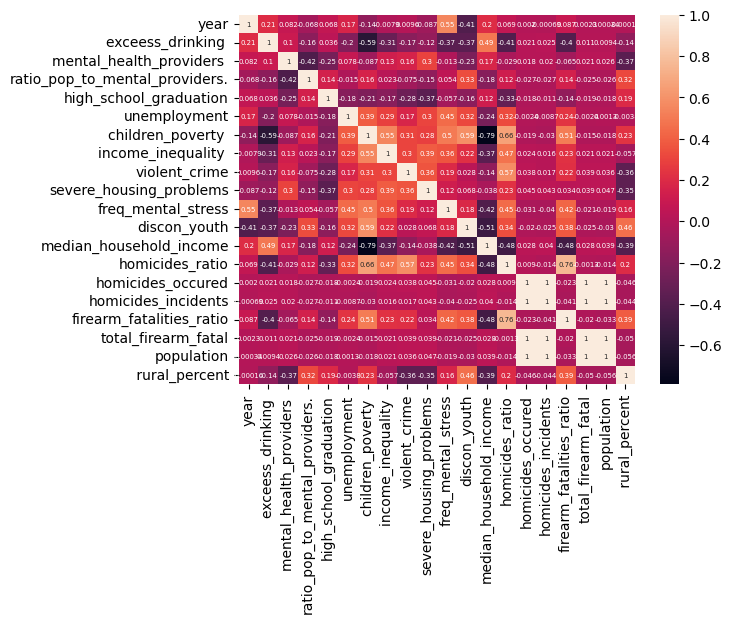

MissingDataError: exog contains inf or nans

In [17]:
corr_vars = health_demo.corr()

sn.heatmap(corr_vars, annot=True, annot_kws={"size":5})
plt.show()

y = health_demo['freq_mental_stress']
x = health_demo.drop(['freq_mental_stress', 'state','county','year'], axis=1)

#empty model list 
selected_vars = []

#adds current variable to model
for var in x.columns:
    candidate_vars = selected_vars + [var]
    mh_subset = x[candidate_vars]

#fit the model and calcualtes the AIC score
    model_testing = sm.OLS(y, sm.add_constant(mh_subset)).fit()
    aic = model_testing.aic

#AIC = Maximum likelihood value
#If AIC score improved, then keep current variable 
    if not selected_vars or aic < best_aic:
        selected_vars = candidate_vars
        best_aic = aic

forward_stepwise_model = sm.OLS(y, sm.add_constant(health_demo[selected_vars])).fit()

selected_vars

forward_stepwise_plot = sn.pairplot(health_demo,x_vars=selected_vars,y_vars='mental_health', height=10, )
forward_stepwise_plot

for col in x.columns:
    plt.figure()
    sn.regplot(x=x[col], y=y)
    plt.show()
   

In [3]:
health_demo.describe()

,year,exceess_drinking,mental_health_providers,ratio_pop_to_mental_providers.,high_school_graduation,unemployment,children_poverty,income_inequality,violent_crime,severe_housing_problems,freq_mental_stress,discon_youth,median_household_income,homicides_ratio,homicides_occured,homicides_incidents,firearm_fatalities_ratio,total_firearm_fatal,population,rural_percent
count,15970.000000,15970.000000,14799.000000,14799.000000,14088.000000,15965.000000,15965.000000,15959.000000,15030.000000,15970.000000,15970.000000,7643.000000,15964.000000,6687.000000,6687.000000,6.687000e+03,11390.000000,11390.000000,1.597000e+04,15935.000000
mean,2020.000000,0.181143,0.001621,1746.598032,0.878541,0.049482,0.206740,4.515859,252.804624,0.139449,0.136867,0.117429,53466.900025,6.521077,272.278002,4.849745e+06,15.523346,246.499649,3.069013e+05,0.580515
std,1.414258,0.033796,0.001755,2500.870100,0.074114,0.020474,0.088484,0.763140,192.529714,0.046044,0.026531,0.077785,14185.358511,5.144868,3452.605589,6.267248e+07,7.076188,4029.106205,5.911982e+06,0.315483
min,2018.000000,0.064530,0.000000,-980.000000,0.025000,0.007380,0.024000,1.045052,0.000000,0.000000,0.080032,0.000000,22045.000000,0.544572,10.000000,3.746200e+04,1.546821,10.000000,8.600000e+01,0.000000
25%,2019.000000,0.156848,0.000483,446.696162,0.841015,0.035067,0.141000,4.003039,117.952503,0.110904,0.117306,0.064160,44032.000000,3.200000,15.000000,2.934875e+05,10.787629,17.000000,1.111450e+04,0.325473
50%,2020.000000,0.180886,0.001125,863.437500,0.890000,0.045210,0.195000,4.402326,207.113913,0.134075,0.134000,0.095829,51233.000000,5.147557,28.000000,6.355570e+05,14.670382,32.000000,2.652950e+04,0.588250
75%,2021.000000,0.202897,0.002172,1962.733333,0.928000,0.059183,0.259000,4.876775,336.591249,0.160672,0.153270,0.149579,59943.250000,8.141707,71.500000,1.613520e+06,19.056240,74.000000,7.312250e+04,0.862527
max,2022.000000,0.310137,0.027649,39315.000000,1.000000,0.235211,0.747000,11.970639,1819.514407,0.712166,0.263000,0.835200,160305.000000,47.655650,133391.000000,2.274014e+09,78.718021,203079.000000,3.294841e+08,1.000000
